Имеется датасет, полученный в ходе исследования факторов, способных повлиять на депрессию людей, живущих в сельской местности. Задача модели ML --- научиться определять склонность к депрессии (0 --- не страдает, 1 --- страдает). Это типичная задача **бинарной классификации**. Hассмотрим одну из популярных моделей для этой задачи --- логистическую регрессию.

# Логистическая регрессия


Так сложилось, что в задачах бинарной классификации мы большее значение придаём тому, чтобы научиться определять класс 1, нежели класс 0. Класс 1 представляет собой в каком-то смысле "редкое" событие: письмо со спамом, неплатёжеспособность клиента, наличие заболевания, склонность к депрессии. Будем называть его "положительным" классом, а класс 0 --- "отрицательным". Во многих ситуациях нам важнее знать **оценку вероятности** того, что объект попадёт в положительный класс (вероятность невозврата кредита, вероятность заболевания, вероятность склонности к депрессии). Тогда, задавая различные пороги для этой вероятности (в зависимости от задачи), мы будем таким образом разделять объекты.

Обозначим вероятность положительного события через $P_+$. Очевидно, что вероятность противоположного класса тогда равна $(1-P_+)$. Составим величину, называемую odds ratio ("отношение шансов"):

$$
OR = \frac{P_+}{1-P_+}.
$$

$OR$ показывает отношение вероятностей того, произойдёт наше событие или не произойдёт. При этом величины $P_+$ и $OR$ содержат, по сути, одинаковую информацию. Но если $P_+\in(0; 1)$, то $OR\in(0; +\infty)$. Если теперь рассмотреть величину логарифма отношения шансов $\log OR$, то мы придём к тому, что $\log OR\in(-\infty; +\infty)$. И вот мы получили, что можем прогнозировать **вероятность**, прогнозируя величину, лежащую от минус до плюс бесконечности! А эту величину можно предсказывать с помощью **регрессионной модели**. 

## Сигма-функция

Пусть теперь мы прогнозируем $\log OR$ с помощью линейной регрессии: $\log OR=\mathbf{w}^T\mathbf{x}$. Как из этой величины получить $P_+$?

$$
P_+ = \frac{OR}{1+OR} = \frac{e^{\log OR}}{1+e^{\log OR}}=\frac{e^{\mathbf{w}^T\mathbf{x}}}{1+e^{\mathbf{w}^T\mathbf{x}}}=\frac{1}{1+e^{-\mathbf{w}^T\mathbf{x}}}.
$$

Интересно, что мы получили здесь довольно важную функцию в машинном обучении (нет, на этот раз не логарифм :)):

$$
\sigma(z) = \frac{1}{1+e^{-z}},
$$

называемую сигма-функцией, или сигмоидой, или **логистической функцией**. Она ведёт себя так:
![](https://www.researchgate.net/profile/John_Davis82/publication/234049070/figure/fig6/AS:300093912698893@1448559372458/Logistic-sigmoid-function-Maps-real-numbers-to-the-interval-between-0-and-1.png)

Итак, $P_+=\sigma(\mathbf{w}^T\mathbf{x})$. Это важный результат.

Тем самым, с помощью логистической регрессии мы будем прогнозировать **вероятность принадлежности объекта к классу 1**.

## LogLoss, или логистическая функция потерь

Следующий важный момент: **как считать ошибку модели в случае бинарной классификации**? Иными словами, как выбрать функцию потерь и составить функционал качества?

Вновь вспомним принцип максимального правдоподобия. Только что мы получили, что

$$
P_+ = P(y=1 | \mathbf{x}_i, \mathbf{w}) = \sigma(\mathbf{w}^T\mathbf{x}).
$$

Но тогда

$$
P_- = P(y=-1 | \mathbf{x}_i, \mathbf{w}) = 1 - P_+ = 1 - \sigma(\mathbf{w}^T\mathbf{x}_i).
$$

Здесь мы обозначили класс "0" как "-1" для удобства выкладок. Далее можно заметить (проверьте!), что $1 - \sigma(\mathbf{w}^T\mathbf{x}_i)=\sigma(-\mathbf{w}^T\mathbf{x}_i)$: первое из поразительных свойств сигмоиды --- то ли ещё будет! Учитывая последнее, можно записать **общую формулу** для вероятности:

$$
P(y=y_i | \mathbf{x}_i, \mathbf{w}) = \sigma(y_i\mathbf{w}^T\mathbf{x}_i).
$$

Тогда вероятность всей выборки (взятой независимо и из одного распределения) запишется как произведение вероятностей:

$$
P(\mathbf{y}|\mathbf{X}, \mathbf{w}) = \prod_{i=1}^{l} P(y=y_i | \mathbf{x}_i, \mathbf{w}).
$$

Это **функция правдоподобия выборки**. Её нужно максимизировать. Как обычно, вместо максимизации произведения множества слагаемых нам бы хотелось максимизировать сумму. Поэтому возьмём логарифм правдоподобия:

$$
\begin{multline*}
\log P(\mathbf{y}|\mathbf{X}, \mathbf{w}) = \log \prod_{i=1}^{l} P(y=y_i | \mathbf{x}_i, \mathbf{w}) = 
\sum_{i=1}^{l} \log P(y=y_i | \mathbf{x}_i, \mathbf{w}) = \\
=\sum_{i=1}^{l} \log \sigma(y_i\mathbf{w}^T\mathbf{x}_i) = \sum_{i=1}^{l} \log \frac{1}{1+e^{-y_i\mathbf{w}^T\mathbf{x}_i}}=-\sum_{i=1}^{l}\log \left(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i}\right) \to \max\limits_\mathbf{w},
\end{multline*}
$$

то есть максимизация прадоподобия эквивалентна минимизации функционала

$$
Q(\mathbf{w}) = \sum_{i=1}^{l}\log \left(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i}\right) \to \min\limits_\mathbf{w}.
$$

Последний функционал под знаком суммы содежит **логистическую функцию потерь**, или лог-лосс: $L_{log}(z)=\log(1+e^{-z})$. Её график выглядит следующим образом:
![](https://www.researchgate.net/profile/Thomas_Hofmann10/publication/2877976/figure/fig1/AS:650449568923660@1532090670890/Loss-values-of-0-1-exp-and-log-loss-functions-in-a-binary-classification-problem.png)

и мажорирует обычную пороговую функцию потерь:
$$
L(y, \widehat{y}) = \begin{cases}0, & \text{if } y=\widehat{y}, \\ 1, & \text{if } y\neq\widehat{y}. \end{cases}
$$

Итак, мы только что показали, что, с точки зрения статистики и метода максимального правдоподобия, **оптимальным выбором функции потерь** для логистической регрессии является **лог-лосс**, или **логистическая функция потерь**. Минимизируя лог-лосс, мы тем самым уменьшаем число ошибок классификации.

## Регуляризация логистической регрессии

В моделях логистической регрессии, как и в линейной регрессии, используют разные типы **регуляризации** ($L_1$, $L_2$, Elastic Net) для уменьшения переобучения модели. Функционал качества в случае $L_2$-регуляризации выглядит так:

$$
Q_{reg}(\mathbf{w}) = C\cdot \sum_{i=1}^{l}\log \left(1+e^{-y_i\mathbf{w}^T\mathbf{x}_i}\right)+\|\mathbf{w}\|^2 \to \min\limits_\mathbf{w}.
$$

Здесь гиперпараметр $C>0$ играет роль **обратной силы регуляризации**. Чем больше $C$, тем меньше "штраф" за увеличение весов модели. И наоборот, чем меньше $C$, тем эффект регуляризации больше.

## Почему логистическая регрессия --- это линейный классификатор?

Мы ещё не обсудили вопрос, почему же рассмотренная нами модель относится к **линейным моделям**. Для этого рассмотрим игрушечный пример с точками на плоскости.

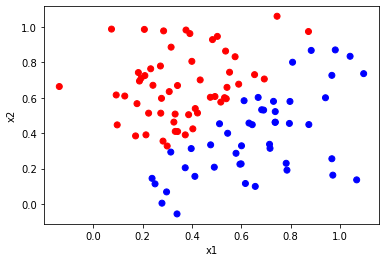

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0) #задаём начальные условия для генератора псевдослучайных чисел
X = np.random.normal(loc=0.5, scale=0.25, size=(100, 2))
y = (X[:, 1] > X[:, 0]).astype('int') # разделяющая граница: y=x (биссектриса первой четверти)
plt.scatter(X[:, 0], X[:, 1], color=['red' if c==1 else 'blue' for c in y])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X, y)

w = log_reg.coef_
bb = log_reg.intercept_

print(w, bb)

[[-3.29153106  3.02599673]] [0.23181665]


Построим разделяющую границу между классами, которую "выучила" наша модель. Для этого запишем уравнение
$$
w_1\cdot x_1 + w_2\cdot x_2 + b = 0
$$
и выразим из него $x_2$ для более привычного построения графика:
$$
x_2 = -\frac{w_1}{w_2}x_1-\frac{b}{w_2}.
$$

In [ ]:
w1 = w[0][0]
w2 = w[0][1]
b = bb[0]

print('w1 = '+str(w1), '\nw2 = '+str(w2), '\nb = '+str(b))

w1 = -3.2915310634294572 
w2 = 3.0259967314775613 
b = 0.2318166472532856


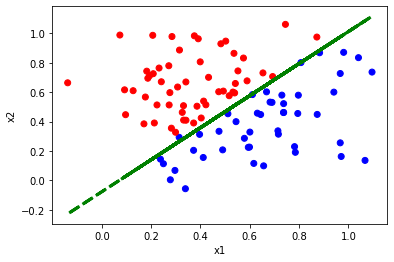

In [ ]:
plt.scatter(X[:, 0], X[:, 1], color=['red' if c==1 else 'blue' for c in y])
plt.plot(X[:, 0], -w1/w2*X[:, 0]-b/w2, color='green', linewidth=3, linestyle="dashed")

plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Итак, модель логистической регрессии почти идеально восстановила нашу разделяющую границу. А что будет, если разделяющая граница нелинейна?

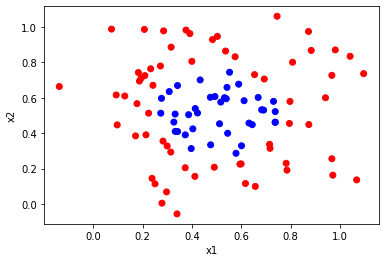

In [ ]:
yy = ((X[:, 0]-0.5)**2 + (X[:, 1]-0.5)**2 > 0.25**2).astype('int')
plt.scatter(X[:, 0], X[:, 1], color=['red' if c==1 else 'blue' for c in yy])
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Теперь посмотрим, что выучит наша модель.

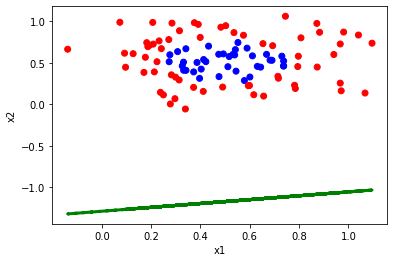

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X, yy)

w1 = log_reg.coef_[0][0]
w2 = log_reg.coef_[0][1]
b = log_reg.intercept_[0]

plt.scatter(X[:, 0], X[:, 1], color=['red' if c==1 else 'blue' for c in yy])
plt.plot(X[:, 0], -w1/w2*X[:, 0]-b/w2, color='green', linewidth=3, linestyle="dashed")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

Как видим, несмотря на изменения в исходных данных, модель по-прежнему "учит" только линейную границу между классами, причём в данном случае далеко от идеала.

Тем не менее, в многомерных пространствах картинка получается лучше, и даже линейный классификатор способен дать хороший результат. Кроме того, мы можем использовать приём, который называется **"создание полиномиальных признаков"**. Это означает, что, помимо $x_1, x_2, \ldots, x_n$, модель также рассматривает их попарные произведения степени не выше $k$ (в случае $k=2$ это будут $x_1^2$, $x_1x_2$, $x_2^2$) в качестве признаков. Этот приём описан в [статье](https://habr.com/ru/company/ods/blog/323890/) OpenDataScience-сообщества (раздел 4). 

# Логистическая регрессия в действии

## Загрузка и препроцессинг

In [ ]:
import pandas as pd
df = pd.read_csv('/content/accelerometer.csv')

df = df.loc[df['y'] != '-']

df['y'] = df['y'].astype(float)
df.head()

,wconfid,pctid,x,y,z
0,1,20,1.004,0.090,-0.125
1,1,20,1.004,-0.043,-0.125
2,1,20,0.969,0.090,-0.121
3,1,20,0.973,-0.012,-0.137
4,1,20,1.000,-0.016,-0.121


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86195 entries, 0 to 86194
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   wconfid  86195 non-null  int64  
 1   pctid    86195 non-null  int64  
 2   x        86195 non-null  float64
 3   y        86195 non-null  float64
 4   z        86195 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 3.9 MB


In [ ]:
df.nunique()

wconfid       2
pctid        17
x          2512
y          2513
z          1706
dtype: int64

Все столбцы числовые, однако данные всё ещё не готовы к построению модели. Нам необходимо:
* убрать пропуски (в столбце **no_lasting_investmen**);
* убрать лишний признак **Survey_id** (номер опроса);
* перевести категориальные признаки в бинарные (get_dummies);
* стандартизировать признаки с неудобным масштабом.

In [ ]:

df_1 = df.dropna() #удаляем пропуски во всей таблице

# df_1 = df_1.loc[df['wconfid'] != 2]

# df_2 = df_1.drop(['Survey_id', 'depressed'], axis=1) #удаляем ненужные столбцы

# Переведём признаки "Номер виллы" и "Уровень образования" в бинарные 
# * мы не уверены на 100 %, что уровень образования ранговый, поэтому считаем его категориальным
# df_3 = pd.get_dummies(df_2, columns=['Ville_id', 'education_level'])

# Масштабирование
col_names = df.columns.values #это имена всех столбцов
# large_numbers = [col for col in col_names if df[col].mean() > 10000] #имена тех, у кого среднее > 10000
from sklearn.preprocessing import MinMaxScaler
y = df_1['wconfid']
scaler = MinMaxScaler()
X_st = scaler.fit_transform(df_1)


# # Переприсвоим старым колонкам новые
# df_3[large_numbers] = X_st
df_3 = pd.DataFrame(X_st)
df_3.head()
# df_3.head()

,0,1,2,3,4
0,0.0,0.0,0.562891,0.505751,0.528778
1,0.0,0.0,0.562891,0.497437,0.528778
2,0.0,0.0,0.560703,0.505751,0.529146
3,0.0,0.0,0.560953,0.499375,0.527673
4,0.0,0.0,0.562641,0.499125,0.529146


## Построение модели и валидация

In [ ]:

X = df_3.drop(0, axis=1)
print(df_3)

from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25, random_state=0)

         0       1         2         3         4
0      0.0  0.0000  0.562891  0.505751  0.528778
1      0.0  0.0000  0.562891  0.497437  0.528778
2      0.0  0.0000  0.560703  0.505751  0.529146
3      0.0  0.0000  0.560953  0.499375  0.527673
4      0.0  0.0000  0.562641  0.499125  0.529146
...    ...     ...       ...       ...       ...
86190  1.0  0.6875  0.546512  0.444924  0.584860
86191  1.0  0.6875  0.582396  0.542386  0.451791
86192  1.0  0.6875  0.570705  0.521380  0.535593
86193  1.0  0.6875  0.565829  0.512066  0.566535
86194  1.0  0.6875  0.557264  0.472993  0.533106

[86195 rows x 5 columns]


In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_valid)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_valid, y_pred))

0.5884727829597661


## Метрики на основе confusion matrix

Разберёмся, так ли хороша наша модель, как кажется (accuracy=84.7 %). Для начала посмотрим на соотношение классов в задаче.

In [ ]:
y.value_counts(normalize=True)

1    0.591682
2    0.408318
Name: wconfid, dtype: float64

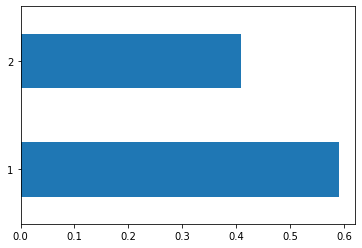

In [ ]:
y.value_counts(normalize=True).plot(kind='barh')
plt.show()

Мы видим, что объектов класса 0 в выборке значительно больше (83.3 %), чем объектов класса 1. Если бы мы решили построить константный классификатор, который предсказывает 0 ВСЕГДА, то accuracy такого классификатора была бы примерно 83.3 %. Из этого можно сделать вывод, что accuracy --- далеко не лучший выбор метрики качества для случая несбалансированных классов.

Какие же есть альтернативы? Прежде всего, это матрица ошибок (confusion_matrix). В ней по строкам расположены истинные значения классов, а по столбцам --- предсказанные моделью. Их обычно обзначают так:
$$
\text{Confusion_Matrix}=
\begin{array}{c|cc} 
& \text{0_pred} & \text{1_pred} \\ \hline
\text{0_true} & TN & FP \\ 
\text{1_true} & FN & TP\end{array}
$$

Здесь:
* $TN$ --- True Negative (правильный отрицательный) --- количество объектов класса 0, которые модель опознала верно;
* $TP$ --- True Positive (правильный положительный) --- количество объектов класса 1, которые модель опознала верно;
* $FP$ --- False Positive (ложный положительный) --- количество объектов класса 0, которые модель ошибочно отнесла к классу 1;
* $FN$ --- False Negative (ложный отрицательный) --- количество объектов класса 1, которые модель ошибочно отнесла к классу 0.

В идеальном случае данная матрица содержит нули вне главной диагонали. На практике же, в зависимости от задачи, мы бы хотели **минимизировать** значения $FN$ либо $FP$. К примеру, в задаче обнаружения спама нам бы не хотелось, чтобы модель помечала как спам нормальные письма, т. е. хотим как можно меньше **ложных срабатываний** (False Positive). В задаче же медицинской диагностики куда важнее не пропустить больных (т. е. нужно минимизировать **пропуски класса 1**, False Negative).

Построим такую матрицу в нашей задаче обнаружения склонности к депрессии.

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
print(confusion_matrix(y_valid, y_pred))

[[9617 2994]
 [5874 3064]]


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


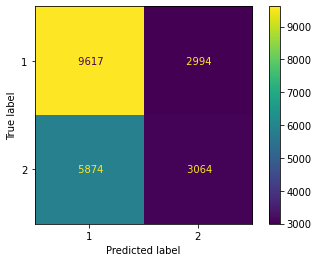

In [ ]:
plot_confusion_matrix(log_reg, X_valid, y_valid, values_format='5g')
plt.show()

Итак, наша модель определяет 4 человек как склонных к депрессии (в то время как они "здоровы"), а также 50 человек помечает "здоровыми", в то время как они склонны к депрессии. Последнее обстоятельство явно не очень хорошо. Ведь всего у нас было 52 случая склонности к депрессии, из которых модель сумела найти только два!

### Точность, полнота и F-мера

На основе матрицы ошибок можно построить следующие три метрики, каждая из которых лучше отображает результаты классификации для несбалансированных классов. Это **точность** (precision), **полнота** (recall) и **F-мера** (f1_score).

$$
\text{Confusion_Matrix}=
\begin{array}{c|cc} 
& \text{0_pred} & \text{1_pred} \\ \hline
\text{0_true} & TN & FP \\ 
\text{1_true} & FN & TP\end{array}
$$

* $\text{Precision}=\dfrac{TP}{TP+FP}$: показывает, насколько можно "доверять" модели, если она показала класс 1;
* $\text{Recall}=\dfrac{TP}{TP+FN}$: показывает, как хорошо модель умеет находить класс 1;
* $F_1=\dfrac{2\cdot \text{Precision}\cdot \text{Recall}}{\text{Precision}+\text{Recall}}$: гармоническое среднее между точностью и полнотой.

Таким образом, 
* если мы хотим минимизировать $FP$, то лучше в качестве метрики брать precision;
* если мы хотим минимизировать $FN$, то лучше в качестве метрики брать recall;
* если мы сомневаемся или хотим минимизировать оба значения, лучше подойдёт f1_score.

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score
print('Precision:', precision_score(y_valid, y_pred))
print('Recall:', recall_score(y_valid, y_pred))
print('F1 score:', f1_score(y_valid, y_pred))

Precision: 0.6208120844361242
Recall: 0.76258821663627
F1 score: 0.6844352715109246


## Настройка гиперпараметров логистической регрессии по f1_score

Попробуем настроить параметр C (силу регуляризации) для каждого типа регуляризации.

### Регуляризация L2 (по умолчанию)

In [ ]:
from sklearn.model_selection import GridSearchCV

log_reg = LogisticRegression(solver='liblinear')

C_values = {'C': np.logspace(-3, 3, 10)}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='f1')
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='f1')

In [ ]:
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)

{'C': 0.001}
0.7335547857595005


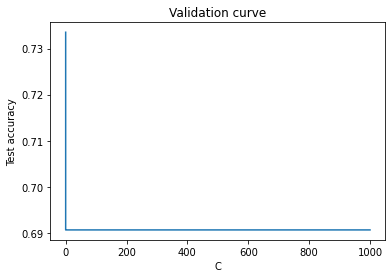

In [ ]:
results_df = pd.DataFrame(logreg_grid.cv_results_)
plt.plot(results_df['param_C'], results_df['mean_test_score'])

# Подписываем оси и график
plt.xlabel('C')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

### Регуляризация L1

In [ ]:
log_reg = LogisticRegression(solver='liblinear', penalty='l1')

C_values = {'C': np.logspace(-3, 3, 10)}
logreg_grid = GridSearchCV(log_reg, C_values, cv=5, scoring='f1')
logreg_grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=LogisticRegression(penalty='l1', solver='liblinear'),
             param_grid={'C': array([1.00000000e-03, 4.64158883e-03, 2.15443469e-02, 1.00000000e-01,
       4.64158883e-01, 2.15443469e+00, 1.00000000e+01, 4.64158883e+01,
       2.15443469e+02, 1.00000000e+03])},
             scoring='f1')

In [ ]:
print(logreg_grid.best_params_)
print(logreg_grid.best_score_)

{'C': 0.001}
0.7451642643302201


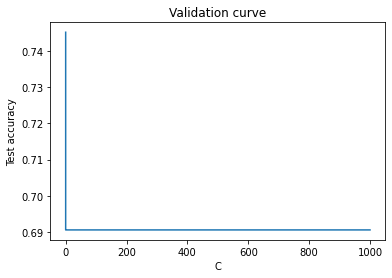

In [ ]:
results_df = pd.DataFrame(logreg_grid.cv_results_)
plt.plot(results_df['param_C'], results_df['mean_test_score'])

# Подписываем оси и график
plt.xlabel('C')
plt.ylabel('Test accuracy')
plt.title('Validation curve')
plt.show()

In [ ]:
y_pred = logreg_grid.best_estimator_.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred))

[[12611     0]
 [ 8938     0]]
F1 score valid: 0.7383489461358314


Стала ли наша модель лучше? Однозначно сказать трудно :)

Однако уже понятно, что модель недообучена (слабый результат на train + слабый результат на valid). Возможно, в неё стоит добавить полиномиальные фичи. Но тогда возникнет проблема: число признаков больше числа объектов. Другая возможная причина: у нас просто мало данных (всего около 1400 объектов).

# Попытки улучшить модель

In [ ]:
# kNN (не помог)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred))

[[10231  2380]
 [ 2229  6709]]
F1 score valid: 0.8161620996370309


In [ ]:
knn_params = {'n_neighbors': np.arange(1, 50, 2)}
knn_grid = GridSearchCV(knn, knn_params, cv=5, scoring='f1')
knn_grid.fit(X_train, y_train)

y_pred = knn_grid.best_estimator_.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred))

[[10162  2449]
 [ 1961  6977]]
F1 score valid: 0.8217029190587856


In [ ]:
# Random Forest (не помог)
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred))

[[10208  2403]
 [ 2388  6550]]
F1 score valid: 0.8099337485619075


In [ ]:
# Искусственное добавление объектов класса 1

from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_train, y_train)

In [ ]:
# Проверим баланс
y_ros.value_counts()

1    38389
2    38389
Name: wconfid, dtype: int64

In [ ]:
# Логистическая регрессия с добавлением класса 1
logreg_ros = LogisticRegression(solver='liblinear')
logreg_ros.fit(X_ros, y_ros)
y_pred = logreg_ros.predict(X_valid)

print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred))

[[7402 5209]
 [3569 5369]]
F1 score valid: 0.6277669408871173


In [ ]:
# Подбор гиперпараметров
logreg_params = {'C': np.logspace(-3, 3, 10), 'penalty': ['l2', 'l1']}
logreg_grid = GridSearchCV(logreg_ros, logreg_params, cv=5, scoring='f1')
logreg_grid.fit(X_ros, y_ros)

y_pred = logreg_grid.best_estimator_.predict(X_valid)
print(confusion_matrix(y_valid, y_pred))
print('F1 score valid:', f1_score(y_valid, y_pred))

[[8163 4448]
 [4341 4597]]
F1 score valid: 0.6500497710531555


# Задание

1. Выбрать датасет https://archive.ics.uci.edu/ml/datasets.php
2. Показать результаты преподавателю и получить датасет для защиты работы. Защитить нужно на паре в деть получения датасета от преподавателя.

### Results

|             | knn  | knn_grid | rf | logreg_ros        |logreg_grid| log_reg|
| ---         | --- | ---       | ---        | ---        |---| --- |
| pctid       | 2380 | 10162   | 10208| 8163 |8163| 12611 | 0|
| x       | 2380 | 2449   | 2403| 4448 |4448| 0 |
| y      | 2229 | 1961    | 2388 | 4341 |4341| 8938 |
| z    |6709  | 6977   | 6550| 4597| 4597| 0 |
| F1    |0.816162  | 0.821702   | 0.809933|  0.650049|0.650049 | 0.738348|


# Ссылки:
1. https://www.kaggle.com/code/emstrakhov/ml-logistic-regression/notebook
2. https://archive.ics.uci.edu/ml/datasets.php
